<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B5%90%EA%B3%BC%EC%84%9C_ch5_2_p_179~200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2 합성곱 신경망 맛보기

- fashion_mnist 데이터셋을 사용하여 합성곱 신경망을 구현

Fashion-MNIST 요약

* `torchvision` 내장 예제 데이터셋
* 흑백 이미지, 크기: $28 \times 28$
* 총 이미지 수: $70{,}000$장

  * 훈련 데이터: $60{,}000$장
  * 테스트 데이터: $10{,}000$장
* 픽셀 값 범위: $0 \sim 255$
* 라벨: 정수 $0 \sim 9$
* 클래스 목록:

$$
\begin{array}{|c|l|}
\hline
\textbf{레이블} & \textbf{클래스} \\
\hline
0 & \text{T-Shirt/Top} \\
1 & \text{Trouser} \\
2 & \text{Pullover} \\
3 & \text{Dress} \\
4 & \text{Coat} \\
5 & \text{Sandal} \\
6 & \text{Shirt} \\
7 & \text{Sneaker} \\
8 & \text{Bag} \\
9 & \text{Ankle Boot} \\
\hline
\end{array}
$$



In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

- CPU 혹은 GPU 장치 확인

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
train_dataset = torchvision.datasets.FashionMNIST("/content/drive/MyDrive/25-1 ESAA OB/data", download=True,
                                                  transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("/content/drive/MyDrive/25-1 ESAA OB/data", download=True,
                                                 transform=transforms.Compose([transforms.ToTensor()]))

- 내려받은 fashion_mnist 데이터를 메모리로 불러오기 위해 데이터로더에 전달

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=100)

- 분류에 사용될 클래스 정의

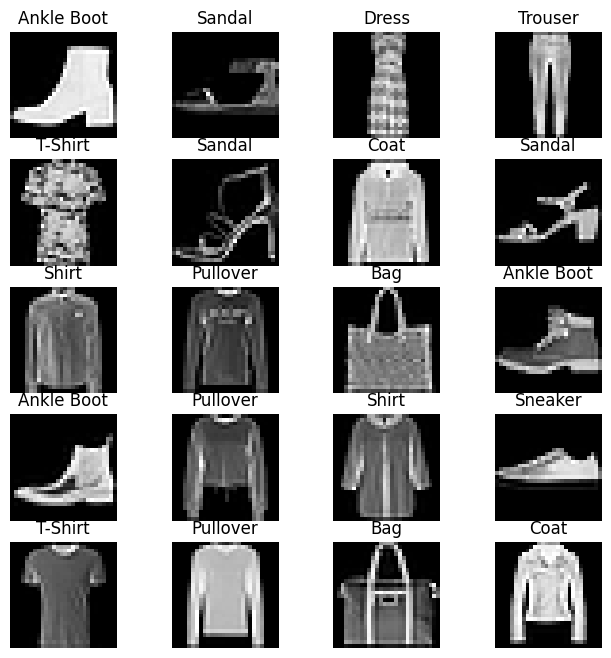

In [8]:
labels_map = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
  img_xy = np.random.randint(len(train_dataset));
  img = train_dataset[img_xy][0][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

- random.rand vs random.randn 차이

In [9]:
import numpy as np
np.random.randint(10) # 0~10의 임의의 숫자를 출력

7

In [10]:
np.random.randint(1, 10) # 1~9의 임의의 숫자를 출력

8

In [11]:
np.random.rand(8) # 0~1 사이의 정규분포표 난수를 행렬로 (1x8) 출력

array([0.13734964, 0.13132157, 0.70147038, 0.63383812, 0.98977655,
       0.94922927, 0.39048206, 0.57782315])

In [12]:
np.random.rand(4, 2) # 0~1 사이의 정규분포표 난수를 행렬로 (4x2) 출력

array([[0.57478331, 0.85762337],
       [0.0383575 , 0.17763991],
       [0.29786296, 0.14242312],
       [0.03042929, 0.01816486]])

In [13]:
np.random.randn(8) # 평균이 0이고 표준편차가 1인 가우시안 정규분포 난수를 행렬로 (1x8) 출력

array([-1.80564519, -0.57501545,  1.03176377, -0.17024813,  0.08295298,
        1.02169809, -1.85282049,  0.46163828])

In [14]:
np.random.randn(4, 2) # 평균이 0이고, 표준편차가 1인 가우시안 정규분포 난수를 (4x2) 출력

array([[ 2.46731753e-01,  4.47601510e-04],
       [-1.17785623e+00,  1.99655309e-01],
       [-3.33450515e-01, -4.74941832e-01],
       [-4.87704270e-01, -9.44362624e-01]])

In [15]:
import numpy as np
examp = np.arange(0, 100, 3) # 1~99의 숫자에서 3씩 건너뛴 행렬을 생성
examp.resize(6, 4) # 행렬의 크기를 6x4로 조정
examp

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45],
       [48, 51, 54, 57],
       [60, 63, 66, 69]])

In [16]:
examp[3] # 3행에 해당하는 모든 요소(값)들을 출력(행과 열은 0부터 시작)

array([36, 39, 42, 45])

In [17]:
examp[3, 3] # 3행의 3번째 열에 대한 값(요소)를 출력하기 때문에 바로 앞의 결과와 동일

np.int64(45)

In [18]:
examp[3][3]

np.int64(45)

In [19]:
examp = np.arange(0, 500, 3)
examp.resize(3, 5, 5)
examp

array([[[  0,   3,   6,   9,  12],
        [ 15,  18,  21,  24,  27],
        [ 30,  33,  36,  39,  42],
        [ 45,  48,  51,  54,  57],
        [ 60,  63,  66,  69,  72]],

       [[ 75,  78,  81,  84,  87],
        [ 90,  93,  96,  99, 102],
        [105, 108, 111, 114, 117],
        [120, 123, 126, 129, 132],
        [135, 138, 141, 144, 147]],

       [[150, 153, 156, 159, 162],
        [165, 168, 171, 174, 177],
        [180, 183, 186, 189, 192],
        [195, 198, 201, 204, 207],
        [210, 213, 216, 219, 222]]])

In [20]:
examp[2][0][3]

np.int64(159)

- 심층 신경망 모델 생성

In [21]:
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop = nn.Dropout(0.25)
    self.fc2 = nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, input_data):
    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

### PyTorch 딥러닝 모델 구성 요약

###  1. 기본 클래스 정의

* 모든 모델 클래스는 `torch.nn.Module`을 상속받아야 함
* `__init__()`은 객체 초기화 시 호출되며, 모델의 구성 요소를 정의함
* `super(ClassName, self).__init__()`은 부모 클래스인 `nn.Module`의 초기화를 호출

### 2. 주요 모듈 설명

### `nn.Linear(in_features, out_features)`

* 입력 크기(in\_features) → 예: 784 (28x28 이미지)
* 출력 크기(out\_features) → 예: 256
* `forward()`에서는 입력만 전달하면 되고, 출력 크기는 미리 정의한 `out_features`로 결정됨

### `nn.Dropout(p)`

* **p**: 드롭아웃 확률 (예: 0.3이면 30% 확률로 뉴런 값을 0으로 만듦)
* 0이 되지 않은 값들은 `(1 / (1 - p))` 배수로 보정됨 → 전체 평균을 유지하기 위함

### `forward()`

* 순전파(forward propagation) 연산을 정의하는 함수
* 반드시 `forward`라는 이름을 사용해야 하며, 모델 객체에 입력 데이터를 전달하면 자동 호출됨
* 입력 → 출력 예측을 수행하는 핵심 함수

###3.  텐서 변형

### `view()`

* PyTorch의 `view()`는 NumPy의 `reshape()`과 유사
* `input.view(-1, 784)`는 입력을 2차원 텐서로 변형

  * `-1`: 해당 차원은 자동으로 계산
  * `784`: 각 샘플의 특징 수

###4. 활성화 함수 지정 방법

| 방법          | 설명         | 위치              |
| ----------- | ---------- | --------------- |
| `F.relu()`  | 함수형 API 사용 | `forward()` 내부  |
| `nn.ReLU()` | 모듈 형태로 정의  | `__init__()` 내부 |



- nn을 사용하는 코드

In [22]:
import torch
import torch.nn as nn

inputs = torch.randn(64, 3, 244, 244)
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
outputs = conv(inputs)
layer = nn.Conv2d(1, 1, 3)

- nn.functional을 사용하는 코드

In [23]:
import torch.nn.functional as F

inputs = torch.randn(64, 3, 244, 244)
weight = torch.randn(64, 3, 3, 3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding=1)

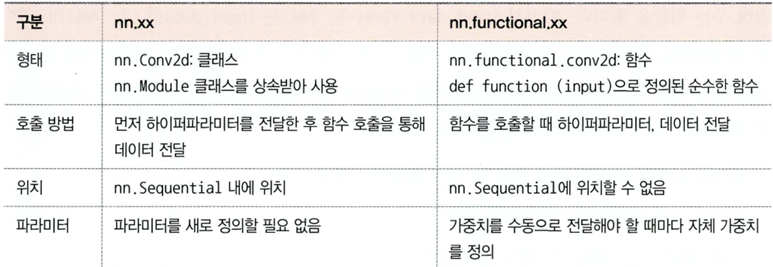

- 심층 신경망에서 필요한 파라미터 정의

In [24]:
learning_rate = 0.001;
model = FashionDNN();
model.to(device)

criterion = nn.CrossEntropyLoss(); # 분류 문제에서 사용하는 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


- 심층 신경망을 이용한 모델 학습

In [25]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50): # count를 50으로 나누었을 때 나머지가 0이 아니라면 실행
        total = 0
        correct = 0
        for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          labels_list.append(labels)
          test = Variable(images.view(100, 1, 28, 28))
          outputs = model(test)
          predictions = torch.max(outputs, 1)[1].to(device)
          predictions_list.append(predictions)
          correct += (predictions == labels).sum()
          total += len(labels)

        accuracy = correct * 100 / total
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)

    if not (count % 500):
      print("Iteration : {}, Accuracy : {}%".format(count, loss.data, accuracy))

Iteration : 500, Accuracy : 0.5626838207244873%
Iteration : 1000, Accuracy : 0.47949087619781494%
Iteration : 1500, Accuracy : 0.3739396929740906%
Iteration : 2000, Accuracy : 0.31772997975349426%
Iteration : 2500, Accuracy : 0.2834376394748688%
Iteration : 3000, Accuracy : 0.3093291223049164%


- 합성곱 네트워크 생성

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # Layer 1: Conv2d -> BatchNorm -> ReLU -> MaxPool
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),  # 입력: 1x28x28 → 출력: 32x28x28
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 출력: 32x14x14
        )

        # Layer 2: Conv2d -> BatchNorm -> ReLU -> MaxPool
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),  # 출력: 64x12x12
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # 출력: 64x6x6
        )

        # Fully Connected Layers
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)  # 클래스 수: 10

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Flatten
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

-  `nn.Sequential`

 * 여러 계층을 **순서대로 묶는 컨테이너**
 * 코드 가독성이 좋아지고 간결해짐
 * 순차적으로 데이터를 처리할 때 유용함


- `Conv2d` (합성곱층)

 * 이미지에서 **특징을 추출**
 * 커널(필터)을 사용해 이미지의 패턴을 감지
 * 입력과 출력은 보통 채널 수로 구분 (흑백=1, 컬러=3 등)

- `BatchNorm2d` (배치 정규화)

 * 각 계층의 **출력 분포를 정규화**
 * 학습을 빠르게 하고 안정화시킴

- `MaxPool2d` (최대 풀링)

 * **이미지 크기를 줄이면서** 중요한 정보 유지
 * 계산량 감소 + 과적합 방지 효과

- `Linear` (완전 연결층)

 * 이미지 데이터를 **1차원 배열로 펼쳐서 분류**
 * 마지막에 분류를 위한 결과(클래스 수)를 출력


- Conv2d 출력 크기 계산

📌 **공식**
`(W - K + 2P) / S + 1`

 * **W**: 입력 크기 (가로 또는 세로)
 * **K**: 커널 크기 (`kernel_size`)
 * **P**: 패딩 크기 (`padding`)
 * **S**: 스트라이드 (`stride`, 기본값 1)

📌 **예시**
 *Fashion MNIST 입력 크기: 28 x 28
 *`nn.Conv2d(1, 32, kernel_size=3, padding=1)`

→ 출력 크기: `(28 - 3 + 2*1) / 1 + 1 = 28`

→ 결과: `[32, 28, 28]` (채널, 높이, 너비)

- MaxPool2d 출력 크기 계산

📌 **공식**

`W / F`

 * **W**: 입력 크기 (Conv2d 출력 크기)
 * **F**: 풀링 커널 크기 (`kernel_size`)
 * 보통 `stride` = `kernel_size`

📌 예시
 - Conv2d 출력 크기: `[32, 28, 28]`
 - `nn.MaxPool2d(kernel_size=2, stride=2)

→ 출력 크기: `28 / 2 = 14`

→ 결과: `[32, 14, 14]`

- view(out.size(0), -1)

 * **다차원 텐서를 1차원으로 평탄화**할 때 사용
 * `-1`은 자동으로 계산되는 차원

📌 예시:
 - `[100, 32, 14, 14]` → `out.view(100, -1)` → `[100, 6272]`


- 합성곱 네트워크를 위한 파라미터 정의

In [28]:
learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


- 모델 학습 및 성능 평가

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50): # count를 50으로 나누었을 때 나머지가 0이 아니라면 실행
        total = 0
        correct = 0
        for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          labels_list.append(labels)
          test = Variable(images.view(100, 1, 28, 28))
          outputs = model(test)
          predictions = torch.max(outputs, 1)[1].to(device)
          predictions_list.append(predictions)
          correct += (predictions == labels).sum()
          total += len(labels)

        accuracy = correct * 100 / total
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)

    if not (count % 500):
      print("Iteration : {}, Accuracy : {}%".format(count, loss.data, accuracy))

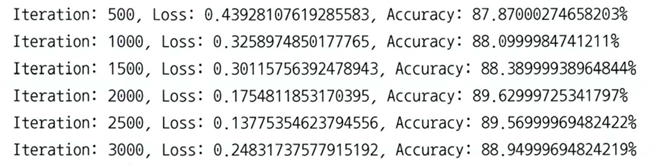

- 심층 신경망과 비교하여 정확도가 약간 더 높음